In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
tejasreddy_iam_handwriting_top50_path = kagglehub.dataset_download('tejasreddy/iam-handwriting-top50')
andrewmvd_car_plate_detection_path = kagglehub.dataset_download('andrewmvd/car-plate-detection')
naderabdalghani_iam_handwritten_forms_dataset_path = kagglehub.dataset_download('naderabdalghani/iam-handwritten-forms-dataset')
francescopettini_license_plate_characters_detection_ocr_path = kagglehub.dataset_download('francescopettini/license-plate-characters-detection-ocr')
ahmadaneeq_tags_licenseplate_path = kagglehub.dataset_download('ahmadaneeq/tags-licenseplate')

print('Data source import complete.')


100%|██████████| 187M/187M [00:01<00:00, 115MB/s]

Extracting files...


100%|██████████| 203M/203M [00:01<00:00, 179MB/s]

Extracting files...


100%|██████████| 4.31G/4.31G [00:31<00:00, 147MB/s]

Extracting files...


100%|██████████| 12.4M/12.4M [00:00<00:00, 106MB/s] 

Extracting files...


100%|██████████| 29.6k/29.6k [00:00<00:00, 34.0MB/s]

Extracting files...
Data source import complete.


code adapted from

https://github.com/NielsRogge/Transformers-Tutorials/blob/master/TrOCR/Fine_tune_TrOCR_on_IAM_Handwriting_Database_using_Seq2SeqTrainer.ipynb

https://huggingface.co/microsoft/trocr-base-printed

https://huggingface.co/docs/transformers/v4.28.1/en/model_doc/vision-text-dual-encoder

https://huggingface.co/docs/transformers/v4.28.1/en/model_doc/trocr#transformers.TrOCRForCausalLM


In [2]:
!pip install -U datasets huggingface_hub fsspec



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.8/514.8 kB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 20.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.32.4
    Uninstalling huggingface-hub-0.32.4:
      Successfully uninstalled huggingface-hub-0.32.4
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.

In [3]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.7 MB/s eta 0:00:00


In [5]:
!pip install transformers paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of paddlex[ie,multimodal,ocr] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 118.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fi

In [ ]:
!pip install paddlepaddle -i https://pypi.tuna.tsinghua.edu.cn/simple

In [24]:
from transformers import TrOCRProcessor

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")

preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [13]:
from paddleocr import PaddleOCR
from datasets import load_dataset
import matplotlib.pyplot as plt
import numpy as np
import PIL
from transformers import VisionEncoderDecoderModel

ocr = PaddleOCR(use_angle_cls=True, lang='en')

[2025/06/14 16:05:42] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_l

In [9]:
from datasets import load_dataset
ds = load_dataset("Teklia/IAM-line")


README.md:   0%|          | 0.00/2.14k [00:00<?, ?B/s]

train.parquet:   0%|          | 0.00/167M [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/24.7M [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/73.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6482 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/976 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2915 [00:00<?, ? examples/s]

In [10]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 6482
    })
    validation: Dataset({
        features: ['image', 'text'],
        num_rows: 976
    })
    test: Dataset({
        features: ['image', 'text'],
        num_rows: 2915
    })
})

In [11]:
def preprocess(example):
    # La imagen original
    image = example["image"].convert("RGB")
    image_np = np.array(image)

    # Realizar inferencia OCR
    result = ocr.ocr(image_np, cls=True)
    if result and result[0]:
        text = result[0][0][1][0]
    else:
        text = ""

    example["predicted_text"] = text
    return example


In [1]:
!pip install imgaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 37.0 MB/s eta 0:00:00


In [ ]:
import torch
import numpy as np
from torchvision.transforms import ToPILImage
from PIL import Image
from imgaug import augmenters as iaa

# Augmentadores definidos
augmenters = iaa.Sequential([
    iaa.AdditiveGaussianNoise(scale=(10, 30)),
    iaa.GammaContrast((0.5, 1.5)),
    iaa.Sometimes(0.5, iaa.SaltAndPepper(0.05)),
    iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0.5, 2.0))),
    iaa.Sometimes(0.6, iaa.MotionBlur(k=5, angle=[-45, 45])),
    iaa.Sometimes(0.5, iaa.Multiply((0.7, 1.3))),
])

# Transforma una entrada del dataset
def degrade_image(image):
    # De PIL Image a numpy array
    img_np = np.array(image)

    # Aumentación
    img_aug_np = augmenters(image=img_np)

    # Vuelve a PIL Image
    img_aug = Image.fromarray(img_aug_np)

    return img_aug

In [ ]:
from torchvision.transforms import ToPILImage
import torch

to_pil = ToPILImage()

def transform(example):
    # Asegúrate de que esté en formato tensor si no lo está
    tensor = torch.tensor(example["pixel_values"])
    if tensor.ndim == 3:
        img = to_pil(tensor)
    else:
        img = to_pil(tensor[0])  # si está en forma (1, C, H, W)

    # Aplica la degradación a la imagen PIL
    degraded_img = degrade_image(img)

    # Vuelve a tensor normalizado para mantener el formato del dataset
    # Convertir la imagen PIL degradada a numpy array
    degraded_img_np = np.array(degraded_img)
    # Asegurarse de que el array numpy tenga el formato (C, H, W) y normalizarlo
    degraded_img_tensor = torch.tensor(degraded_img_np).permute(2, 0, 1).float() / 255.0


    # Usa el procesador para obtener los pixel_values en el formato correcto
    # processor expects a PIL image or a list of PIL images
    pixel_values = processor(degraded_img, return_tensors="pt").pixel_values[0]
    example["pixel_values"] = pixel_values
    return example

dataset = ds.with_transform(transform)


In [14]:
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")


config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# import matplotlib.pyplot as plt
# # Display a single sample's data (image, label, etc.)
# sample = ds['train'][0]
# print("Image path:", sample['image'])
# print("Text label:", sample['text'])
# plt.imshow(sample['image'])
# print(len(ds['train']))


In [15]:
import os
import time
import numpy as np
import pandas as pd
import cv2
import json
from PIL import Image

output_dir = '/kaggle/working/output'
os.makedirs(output_dir, exist_ok=True)

In [16]:
from bs4 import BeautifulSoup

def get_string(file):

    with open(file, 'r') as f:
        data = f.read()

    # Passing the stored data inside the beautifulsoup parser
    bs_data = BeautifulSoup(data, 'xml')

    # Finding all instances of tag
    b_unique = bs_data.find_all('object')
    return ''.join([i.find('name').text for i in b_unique])

def yolo_to_abs(data_dict):#, scale=100.0):
    cord = {}

    original_width = data_dict['original_width']
    original_height = data_dict['original_height']

    pixel_x = int(data_dict['x']/100. * original_width)
    pixel_y = int(data_dict['y']/100. * original_height)
    pixel_width = int(data_dict['width']/100. * original_width)
    pixel_height = int(data_dict['height']/100. * original_height)
#     return[pixel_x, pixel_y, pixel_width, pixel_height]
    cord['x1'] = pixel_x -2#- pixel_width #/2)*original_width
    cord['y1'] = pixel_y -2#- pixel_height#/2)*original_height
    cord['x2'] = pixel_x + pixel_width +5 #/2)*original_width
    cord['y2'] = pixel_y + pixel_height + 5#/2)*original_height
    return cord

In [17]:
def preprocess(image, width: int, height: int, cval: int = 255, mode="letterbox", return_scale=False,):
    """Obtain a new image, fit to the specified size.
    Args:
        image: The input image
        width: The new width
        height: The new height
        cval: The constant value to use to fill the remaining areas of
            the image
        return_scale: Whether to return the scale used for the image
    Returns:
        The new image
    """
    fitted = None
    x_scale = width / image.shape[1]
    y_scale = height / image.shape[0]
    if x_scale == 1 and y_scale == 1:
        fitted = image
        scale = 1
    elif (x_scale <= y_scale and mode == "letterbox") or (
        x_scale >= y_scale and mode == "crop"
    ):
        scale = width / image.shape[1]
        resize_width = width
        resize_height = (width / image.shape[1]) * image.shape[0]
    else:
        scale = height / image.shape[0]
        resize_height = height
        resize_width = scale * image.shape[1]
    if fitted is None:
        resize_width, resize_height = map(int, [resize_width, resize_height])
        if mode == "letterbox":
            fitted = np.zeros((height, width, 3), dtype="uint8") + cval
            image = cv2.resize(image, dsize=(resize_width, resize_height))
            fitted[: image.shape[0], : image.shape[1]] = image[:height, :width]
        elif mode == "crop":
            image = cv2.resize(image, dsize=(resize_width, resize_height))
            fitted = image[:height, :width]
        else:
            raise NotImplementedError(f"Unsupported mode: {mode}")
    if not return_scale:
        return fitted
    return fitted, scale

# Process license-plate-characters-detection-ocr

In [ ]:
# image_dir = '/kaggle/input/license-plate-characters-detection-ocr/LP-characters/images'
# annotations_dir = '/kaggle/input/license-plate-characters-detection-ocr/LP-characters/annotations'

# lic_record = []

# for im_name in sorted(os.listdir(image_dir)):
#     image_path = os.path.join(image_dir, im_name)

#     annot_path = os.path.join(annotations_dir, im_name.split('.')[0]+'.xml')
#     label_string = get_string(annot_path)

#     lic_record.append(dict(text=str(label_string), file_name=image_path))


In [18]:
# image_dir = '/kaggle/input/license-plate-characters-detection-ocr/LP-characters/images'
# annotations_dir = '/kaggle/input/license-plate-characters-detection-ocr/LP-characters/annotations'

lic_record = []

for i in range(len(ds['train'])):
    image_path = ds['train'][i]['image']

#     annot_path = os.path.join(annotations_dir, im_name.split('.')[0]+'.xml')
    label_string = ds['train'][i]['text']

    lic_record.append(dict(text=str(label_string), file_name=image_path))


In [ ]:
# print(lic_record[len(lic_record)-1])
# print(label_string)
# plt.imshow(image_path)

In [19]:
df1 = pd.DataFrame(lic_record)
df1.to_csv('/kaggle/working/lic_labels1.csv')

df1.head()


,text,file_name
0,put down a resolution on the subject,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,and he is to be backed by Mr. Will,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,nominating any more Labour life Peers,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,M Ps tomorrow. Mr. Michael Foot has,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,"Griffiths, M P for Manchester Exchange .",<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [ ]:
df1

,text,file_name
0,put down a resolution on the subject,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,and he is to be backed by Mr. Will,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,nominating any more Labour life Peers,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,M Ps tomorrow. Mr. Michael Foot has,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,"Griffiths, M P for Manchester Exchange .",<PIL.JpegImagePlugin.JpegImageFile image mode=...
...,...,...
6477,beside # Catherine . She had the stories open,<PIL.JpegImagePlugin.JpegImageFile image mode=...
6478,In the train going back to London I sat,<PIL.JpegImagePlugin.JpegImageFile image mode=...
6479,I wish I went to that school . Did you notice,<PIL.JpegImagePlugin.JpegImageFile image mode=...
6480,that girl who said hullo to him in the garden ?,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [20]:
from sklearn.model_selection import train_test_split

# test_df = pd.concat([df1[-21:],df2[-21:]])
test_df = df1[-21:]
# df = pd.concat([df1[:-21], df2[:-21]])
df = df1[:-21]
# train_df, valid_df = train_test_split(df[:-21], test_size=0.2)
train_df, valid_df = train_test_split(df, test_size=0.2, random_state=0)

# we reset the indices to start from zero
train_df.reset_index(drop=True, inplace=True)
valid_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [21]:
print(df1.shape)
print(train_df.shape, valid_df.shape,test_df.shape)

(6482, 2)
(5168, 2) (1293, 2) (21, 2)


# Download/Load Model

In [22]:
import torch
from torch.utils.data import Dataset

class LPDataset(Dataset):
    def __init__(self, root_dir, df, processor, max_target_length=128):
        self.root_dir = root_dir
        self.df = df
        self.processor = processor
        self.max_target_length = max_target_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # get file name + text
        file_name = self.df['file_name'][idx]
        text = self.df['text'][idx]
        # prepare image (i.e. resize + normalize)
        image = file_name.convert("RGB")  # ✅ ya es una imagen

        pixel_values = self.processor(image, return_tensors="pt").pixel_values
        # add labels (input_ids) by encoding the text
        labels = self.processor.tokenizer(
            text, padding="max_length", max_length=self.max_target_length).input_ids
        # important: make sure that PAD tokens are ignored by the loss function
        labels = [label if label != self.processor.tokenizer.pad_token_id else -100 for label in labels]

        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(labels)}
        return encoding

    def __iter__(self):
        for i in range(self.__len__()):
            yield self.__getitem__(i)

In [25]:
root_dir = ''

class LPDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, df, processor):
        self.root_dir = root_dir
        self.df = df
        self.processor = processor

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # get file name + text
        file_name = self.df['file_name'][idx]
        text = self.df['text'][idx]
        # prepare image (i.e. resize + normalize)
        # image = Image.open(self.root_dir + file_name).convert("RGB") # Original line
        image = file_name.convert("RGB") # Use the image object directly
        pixel_values = self.processor(image, return_tensors="pt").pixel_values
        # add labels (input_ids) by encoding the text
        labels = self.processor.tokenizer(text, padding="max_length", max_length=self.processor.tokenizer.model_max_length).input_ids
        # important: make sure that PAD tokens are ignored by the loss function
        labels = [label if label != self.processor.tokenizer.pad_token_id else -100 for label in labels]

        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(labels)}
        return encoding

train_dataset = LPDataset(root_dir, df=train_df, processor=processor)

test_dataset = LPDataset(root_dir, df=test_df, processor=processor)

eval_dataset = LPDataset(root_dir, df=valid_df, processor=processor)

In [ ]:
# Procesamiento eliminado. PaddleOCR se encarga de la inferencia directamente.


In [27]:
# set special tokens used for creating the decoder_input_ids from the labels
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
# make sure vocab size is set correctly
model.config.vocab_size = model.config.decoder.vocab_size

# set beam search parameters
model.config.eos_token_id = processor.tokenizer.sep_token_id
model.config.max_length = 64
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

In [28]:
!pip install jiwer

In [29]:
import evaluate
import jiwer

# Cargar la métrica CER desde Hugging Face evaluate
wer_metric = evaluate.load("wer")
cer_metric = evaluate.load("cer")



def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    # Decodificar predicciones
    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)

    # Reemplazar -100 por el token de padding antes de decodificar las etiquetas reales
    labels_ids[labels_ids == -100] = processor.tokenizer.pad_token_id
    label_str = processor.batch_decode(labels_ids, skip_special_tokens=True)

    # Calcular CER
    wer_score = wer_metric.compute(predictions=pred_str, references=label_str)
    cer_score = cer_metric.compute(predictions=pred_str, references=label_str)

    return {"cer": cer_score, "wer": wer_score}


In [33]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, default_data_collator

training_args = Seq2SeqTrainingArguments(
    output_dir="./output",
    overwrite_output_dir=True,
    learning_rate=5e-5,                      # 🔧 tasa de aprendizaje inicial
    num_train_epochs=5,                         # 1 época para pruebas rápidas
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    predict_with_generate=True,
    eval_strategy="epoch",                # ✅ evaluar al final de cada época
    save_strategy="epoch",                      # ✅ guardar al final de cada época
    logging_strategy="epoch",                   # ✅ log solo al final
    report_to="none"
)


trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=processor.feature_extractor,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=default_data_collator,
)

In [34]:
train_time = time.time() ## in UTC time
trainer.train()
train_time = time.time() - train_time

print('Train time (sec)', train_time)

Epoch,Training Loss,Validation Loss,Cer,Wer
1,2.656200,1.831404,0.450717,0.610127
2,1.178900,1.363034,0.454061,0.599819
3,0.629900,1.098560,0.447604,0.616004
4,0.299300,0.997825,0.440597,0.581284
5,0.121700,0.904968,0.433733,0.583092


Train time (sec) 3768.2408576011658


In [35]:
save_time = time.time()
model.save_pretrained("/kaggle/working/vit-ocr")
save_time = time.time() - save_time
print('save_time time (sec)', save_time)

save_time time (sec) 4.161535024642944


In [36]:
score_model = VisionEncoderDecoderModel.from_pretrained('/kaggle/working/vit-ocr')
print(score_model)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=False)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (i

# Inference

In [37]:
# file_image = '/kaggle/input/license-plate-characters-detection-ocr/LP-characters/images/0055.png'
file_image = ds['train'][3]['image']
# image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
# image = Image.open(file_image).convert("RGB")
image = file_image.convert("RGB")
score_time = time.time()

pixel_values = processor(image, return_tensors="pt").pixel_values
# text = "industry, ' Mr. Brown commented icily. ' Let us have a"
# if torch.cuda.is_available():
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
pixel_values = pixel_values.to(device)
# # inference
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)

score_time = time.time() - score_time
print('score_time (sec)', score_time)

M tomorrow Mr Michael has
score_time (sec) 0.21295976638793945


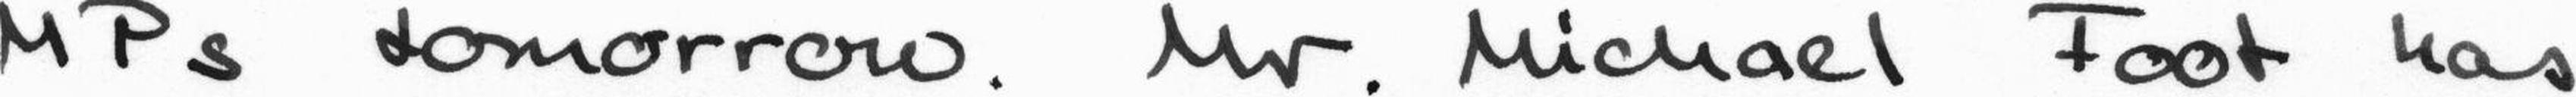

In [38]:
image

In [39]:
pixel_values.shape

torch.Size([1, 3, 384, 384])

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from difflib import SequenceMatcher

def compare_string(true_label, pred_label):

    true_label = true_label.replace(" ", "").replace('-','').replace('0','O')
    pred_label =  pred_label.replace(" ", "").replace('-','').replace('0','O')

    if pred_label == true_label:
        return True

    return False

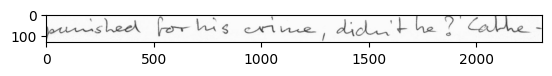

true_label:  punished for his crime , didn't he ? ' cathe-
pred_label:  pun for for crime didn didn he didn he father


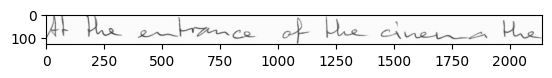

true_label:  at the entrance of the cinema the
pred_label:  at entrance of cinema the theanna


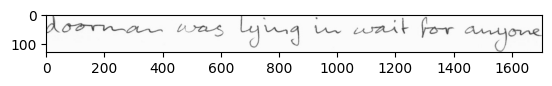

true_label:  doorman was lying in wait for anyone
pred_label:  door was in in in for anyone


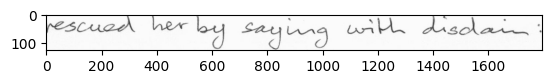

true_label:  rescued her by saying with disdain :
pred_label:  res her her saying disdain :


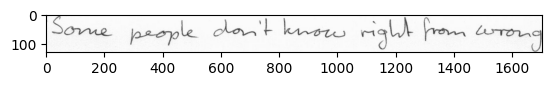

true_label:  ' some people don't know right from wrong
pred_label:  ' people don don know from wrong wrong


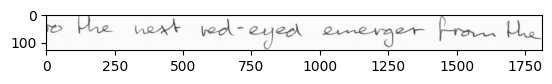

true_label:  to the next red-eyed emerger from the
pred_label:  to next next--- energetic from


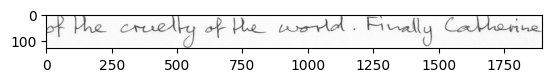

true_label:  of the cruelty of the world . finally catherine
pred_label:  of cruelty the of world finally


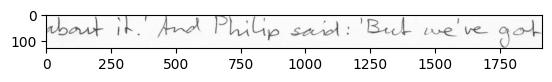

true_label:  about it . ' and philip said : ' but we 've got
pred_label:  about . . philip philip : : ; : : : weveveve got


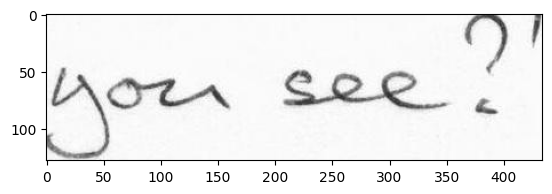

true_label:  you see ? '
pred_label:  you see '


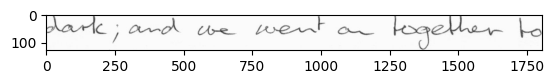

true_label:  dark ; and we went on together to
pred_label:  dark , we on on on to to to


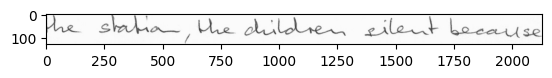

true_label:  the station , the children silent because
pred_label:  the , , children the silent silent


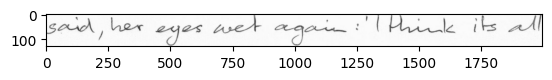

true_label:  said , her eyes wet again : ' i think its all
pred_label:  said , eyes again ' think all


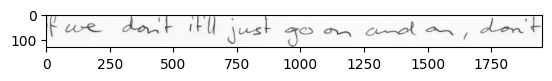

true_label:  if we don't it 'll just go on and on , don't
pred_label:  if don don it just go and ,'t't


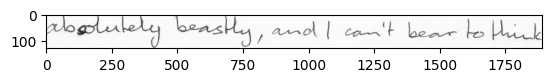

true_label:  absolutely beastly , and i can't bear to think
pred_label:  absolutely , , i , i am can bear think


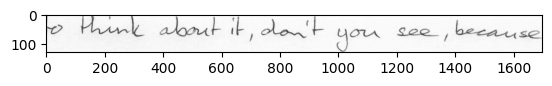

true_label:  to think about it , don't you see , because
pred_label:  to about it it don you see because


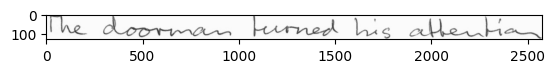

true_label:  the doorman turned his attention
pred_label:  the turned his


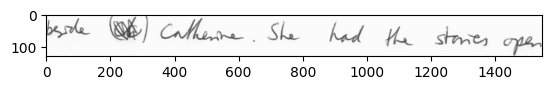

true_label:  beside # catherine . she had the stories open
pred_label:  ber # # . . . shame she the the the open open


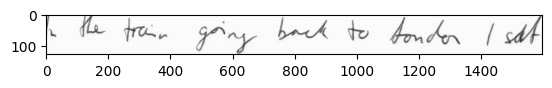

true_label:  in the train going back to london i sat
pred_label:  in train back back london self


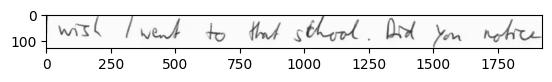

true_label:  i wish i went to that school . did you notice
pred_label:  i i i i went went that that . you notice


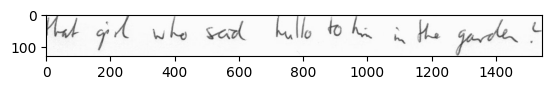

true_label:  that girl who said hullo to him in the garden ?
pred_label:  that who who hull to in in garden


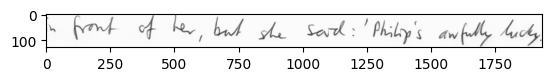

true_label:  in front of her , but she said : ' philip 's awfully lucky .
pred_label:  in of of , she she but said ' philips badly .


In [41]:
correct_char = 0
total_char = 0
correct = 0

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for _, val  in test_df.iterrows():

    image = val['file_name'].convert("RGB")
    pixel_values = processor(image, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)
    generated_ids = model.generate(pixel_values)
    pred_label = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    true_label = val['text']

#     pr = prediction[i]
# #     tr = y_true[i]
#     total_char += len(true_label)
    correct_char += SequenceMatcher(None, true_label, pred_label).ratio()

# #     for j in range(min(len(true_label), len(pred_label))):
# #         if true_label[j] == pred_label[j]:
# #             correct_char += 1

    if compare_string(true_label, pred_label) :
        correct += 1
    else:
        plt.imshow(np.asarray(image))
        plt.show()
        print('true_label: ',true_label.lower())
        print('pred_label: ',pred_label.lower())

  0%|          | 0/21 [00:00<?, ?it/s]

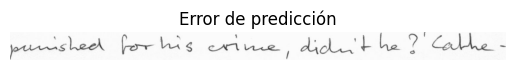

  5%|▍         | 1/21 [00:00<00:06,  3.24it/s]

TRUE: punished for his crime , didn't he ? ' Cathe-
PRED: pun for for crime didn didn he didn he father


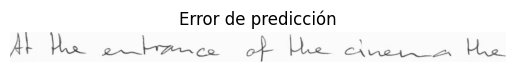

 10%|▉         | 2/21 [00:00<00:06,  2.75it/s]

TRUE: At the entrance of the cinema the
PRED: At entrance of cinema the theanna


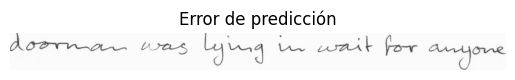

 14%|█▍        | 3/21 [00:00<00:05,  3.35it/s]

TRUE: doorman was lying in wait for anyone
PRED: door was in in in for anyone


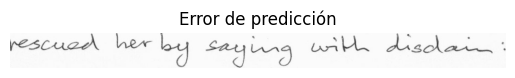

 19%|█▉        | 4/21 [00:01<00:04,  3.69it/s]

TRUE: rescued her by saying with disdain :
PRED: res her her saying disdain :


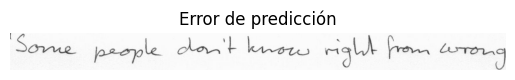

 24%|██▍       | 5/21 [00:01<00:04,  3.86it/s]

TRUE: ' Some people don't know right from wrong
PRED: ' people don don know from wrong wrong


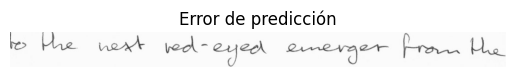

 29%|██▊       | 6/21 [00:01<00:03,  3.96it/s]

TRUE: to the next red-eyed emerger from the
PRED: to next next--- energetic from


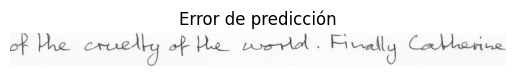

 33%|███▎      | 7/21 [00:01<00:03,  4.11it/s]

TRUE: of the cruelty of the world . Finally Catherine
PRED: of cruelty the of world Finally


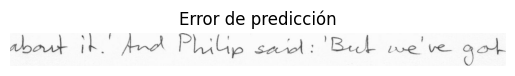

 38%|███▊      | 8/21 [00:02<00:03,  3.41it/s]

TRUE: about it . ' And Philip said : ' But we 've got
PRED: about . . Philip Philip : : ; : : : weveveve got


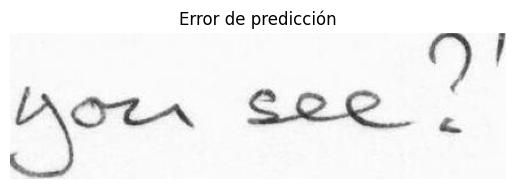

 43%|████▎     | 9/21 [00:02<00:03,  3.90it/s]

TRUE: you see ? '
PRED: you see '


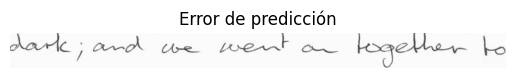

 48%|████▊     | 10/21 [00:02<00:03,  3.22it/s]

TRUE: dark ; and we went on together to
PRED: dark , we on on on to to to


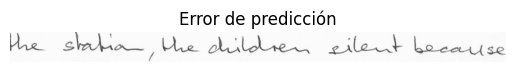

 52%|█████▏    | 11/21 [00:03<00:02,  3.53it/s]

TRUE: the station , the children silent because
PRED: the , , children the silent silent


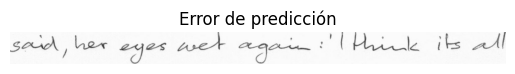

 57%|█████▋    | 12/21 [00:03<00:02,  3.65it/s]

TRUE: said , her eyes wet again : ' I think its all
PRED: said , eyes again ' think all


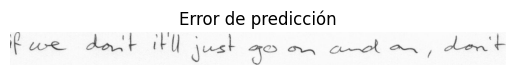

 62%|██████▏   | 13/21 [00:03<00:02,  3.61it/s]

TRUE: if we don't it 'll just go on and on , don't
PRED: If don don it just go and ,'t't


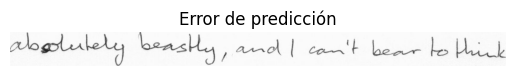

 67%|██████▋   | 14/21 [00:03<00:01,  3.58it/s]

TRUE: absolutely beastly , and I can't bear to think
PRED: absolutely , , I , I am can bear think


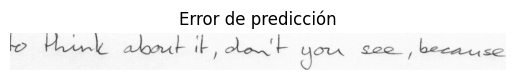

 71%|███████▏  | 15/21 [00:04<00:01,  3.48it/s]

TRUE: to think about it , don't you see , because
PRED: to about it it don you see because


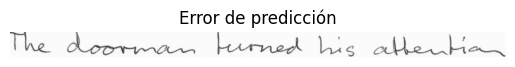

 76%|███████▌  | 16/21 [00:04<00:01,  3.19it/s]

TRUE: The doorman turned his attention
PRED: The turned his


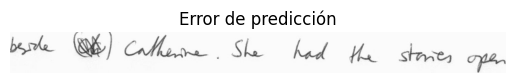

 81%|████████  | 17/21 [00:04<00:01,  3.14it/s]

TRUE: beside # Catherine . She had the stories open
PRED: ber # # . . . shame She the the the open open


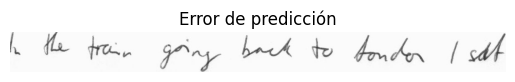

 86%|████████▌ | 18/21 [00:05<00:00,  3.52it/s]

TRUE: In the train going back to London I sat
PRED: In train back back London self


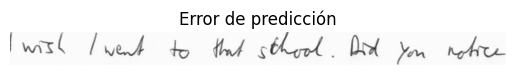

 90%|█████████ | 19/21 [00:05<00:00,  3.44it/s]

TRUE: I wish I went to that school . Did you notice
PRED: I I I I went went that that . you notice


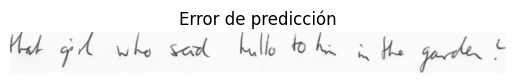

 95%|█████████▌| 20/21 [00:05<00:00,  3.02it/s]

TRUE: that girl who said hullo to him in the garden ?
PRED: that who who hull to in in garden


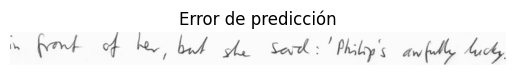

100%|██████████| 21/21 [00:06<00:00,  3.38it/s]

TRUE: in front of her , but she said : ' Philip 's awfully lucky .
PRED: in of of , she she but said ' Philips badly .

✅ CER: 0.4279
✅ WER: 0.5684


In [42]:
import torch
from difflib import SequenceMatcher
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import evaluate  # métrica CER/WER oficial de Hugging Face

# Inicializar métricas
wer_metric = evaluate.load("wer")
cer_metric = evaluate.load("cer")

# Listas para almacenar predicciones y etiquetas reales
predictions = []
references = []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Evaluación
for _, val in tqdm(test_df.iterrows(), total=len(test_df)):

    image = val['file_name'].convert("RGB")
    text_true = val['text']

    # Preprocesamiento e inferencia
    pixel_values = processor(image, return_tensors="pt").pixel_values.to(device)
    with torch.no_grad():
        generated_ids = model.generate(pixel_values)
    text_pred = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # Guardar para métricas
    references.append(text_true)
    predictions.append(text_pred)

    # Mostrar si hay error (opcional)
    if text_true.strip().lower() != text_pred.strip().lower():
        plt.imshow(np.asarray(image))
        plt.title("Error de predicción")
        plt.axis("off")
        plt.show()
        print("TRUE:", text_true)
        print("PRED:", text_pred)

# Calcular CER y WER
cer = cer_metric.compute(predictions=predictions, references=references)
wer = wer_metric.compute(predictions=predictions, references=references)

print(f"\n✅ CER: {cer:.4f}")
print(f"✅ WER: {wer:.4f}")


In [43]:
# correct_char = 0
# total_char = 0
# correct = 0

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# for _, val  in test_df.iterrows():

#     image = Image.open(val['file_name']).convert("RGB")
#     pixel_values = processor(image, return_tensors="pt").pixel_values
#     pixel_values = pixel_values.to(device)
#     generated_ids = model.generate(pixel_values)
#     pred_label = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

#     true_label = val['text']

# #     pr = prediction[i]
# # #     tr = y_true[i]
# #     total_char += len(true_label)
#     correct_char += SequenceMatcher(None, true_label, pred_label).ratio()

# # #     for j in range(min(len(true_label), len(pred_label))):
# # #         if true_label[j] == pred_label[j]:
# # #             correct_char += 1

#     if compare_string(true_label, pred_label) :
#         correct += 1
#     else:
#         plt.imshow(np.asarray(image))
#         plt.show()
#         print('true_label',true_label)
#         print('pred_label',pred_label)

# Result on test dataset

In [44]:
print(f'correct {correct}, total {len(test_df)}')
print('performance on test  data')
print('Correct characters predicted : %.2f%%' %(correct_char*100/test_df.shape[0]))
print('Correct lines predicted      : %.2f%%' %(correct*100/test_df.shape[0]))

correct 0, total 21
performance on test  data
Correct characters predicted : 70.64%
Correct lines predicted      : 0.00%


In [ ]:
# correct_char = 0
# total_char = 0
# correct = 0

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# for _, val  in lic_df.iterrows():

#     image = Image.open(val['file']).convert("RGB")
#     pixel_values = processor(image, return_tensors="pt").pixel_values
#     pixel_values = pixel_values.to(device)
#     generated_ids = model.generate(pixel_values)
#     pred_label = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

#     true_label = val['label']

# #     pr = prediction[i]
# # #     tr = y_true[i]
# #     total_char += len(true_label)
#     correct_char += SequenceMatcher(None, true_label, pred_label).ratio()

# # #     for j in range(min(len(true_label), len(pred_label))):
# # #         if true_label[j] == pred_label[j]:
# # #             correct_char += 1

#     if compare_string(true_label, pred_label) :
#         correct += 1
#     else:
#         plt.imshow(np.asarray(image))
#         plt.show()
#         print('true_label',true_label)
#         print('pred_label',pred_label)

# Result on Car DataSet

In [ ]:
# print('performance on original data')
# print('Correct characters predicted : %.2f%%' %(correct_char*100/lic_df.shape[0]))
# print('Correct words predicted      : %.2f%%' %(correct*100/lic_df.shape[0]))